In [12]:
import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [13]:
n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]],
                             shuffle=True, cluster_std=0.3)
x_test, y_test   = make_blobs(n_samples=20, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]],
                             shuffle=True, cluster_std=0.3)

In [14]:
def label_map(y_, from_, to_):
    y = numpy.copy(y_)
    
    for f in from_:
        y[y_ == f] = to_
    return y

In [15]:
y_train = label_map(y_train, [0,1], 0)
y_train = label_map(y_train, [2,3], 1)
y_test  = label_map(y_test,  [0,1], 0)
y_test  = label_map(y_test,  [2,3], 1)

In [18]:
def vis_data(x, y=None, c='r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x, y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*', markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

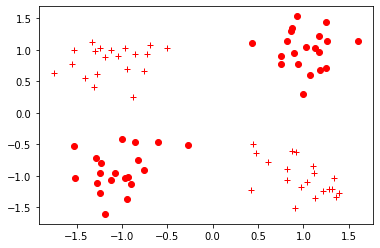

In [21]:
plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [22]:
x_train.shape

(80, 2)

In [23]:
x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(y_train)
x_test  = torch.FloatTensor(x_test)
y_test  = torch.FloatTensor(y_test)

In [24]:
x_train.shape

torch.Size([80, 2])

In [26]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()
    
    def forward(self, input_tensor):
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        
        return output

In [105]:
model = NeuralNet(2, 5)
learning_rate = 0.03
criterion = torch.nn.BCELoss()

In [106]:
model

NeuralNet(
  (linear_1): Linear(in_features=2, out_features=5, bias=True)
  (relu): ReLU()
  (linear_2): Linear(in_features=5, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [107]:
epochs = 2000

In [108]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [109]:
model.eval()

NeuralNet(
  (linear_1): Linear(in_features=2, out_features=5, bias=True)
  (relu): ReLU()
  (linear_2): Linear(in_features=5, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [110]:
test_loss_before = criterion(model(x_test).squeeze(), y_test)

In [111]:
print('Before Training, test loss is {}'. format(test_loss_before.item()))

Before Training, test loss is 0.7730416059494019


In [112]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)
    
    if epoch % 100 == 0:
        print('Train loss at {} is {}'.format(epoch, train_loss.item()))
        
    train_loss.backward()
    optimizer.step()

Train loss at 0 is 0.7710359692573547
Train loss at 100 is 0.6517435312271118
Train loss at 200 is 0.5662714242935181
Train loss at 300 is 0.4766015410423279
Train loss at 400 is 0.395253986120224
Train loss at 500 is 0.32796698808670044
Train loss at 600 is 0.27377820014953613
Train loss at 700 is 0.2309357225894928
Train loss at 800 is 0.19693787395954132
Train loss at 900 is 0.17032301425933838
Train loss at 1000 is 0.14877955615520477
Train loss at 1100 is 0.13123413920402527
Train loss at 1200 is 0.11699404567480087
Train loss at 1300 is 0.10529011487960815
Train loss at 1400 is 0.09547057002782822
Train loss at 1500 is 0.08714107424020767
Train loss at 1600 is 0.08010606467723846
Train loss at 1700 is 0.07405591011047363
Train loss at 1800 is 0.06879425048828125
Train loss at 1900 is 0.06417906284332275


In [113]:
model.eval()
test_loss_after = criterion(model(x_test).squeeze(), y_test)
print('After Training, test loss is {}'.format(test_loss_after.item()))

After Training, test loss is 0.07737937569618225


In [114]:
# 가중치 저장
torch.save(model.state_dict(), './model.pt')
print('state_dict format of the model: {}'.format(model.state_dict()))

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[ 1.1936,  1.1806],
        [ 1.0455,  1.0382],
        [ 1.8021, -1.2973],
        [-0.3138, -0.1052],
        [-1.0090,  2.0434]])), ('linear_1.bias', tensor([-0.1126, -0.1148,  0.0421, -0.5871,  0.0503])), ('linear_2.weight', tensor([[-1.6890, -1.2880,  2.2001,  0.1440,  2.1353]])), ('linear_2.bias', tensor([-1.9113]))])


In [115]:
model.state_dict()

OrderedDict([('linear_1.weight',
              tensor([[ 1.1936,  1.1806],
                      [ 1.0455,  1.0382],
                      [ 1.8021, -1.2973],
                      [-0.3138, -0.1052],
                      [-1.0090,  2.0434]])),
             ('linear_1.bias',
              tensor([-0.1126, -0.1148,  0.0421, -0.5871,  0.0503])),
             ('linear_2.weight',
              tensor([[-1.6890, -1.2880,  2.2001,  0.1440,  2.1353]])),
             ('linear_2.bias', tensor([-1.9113]))])

In [116]:
# 가중치 불러오기
new_model = NeuralNet(2, 5)
new_model.load_state_dict(torch.load('./model.pt'))

<All keys matched successfully>

In [117]:
new_model.eval()
print('벡터[-1,-1]의 레이블? {}'.format(new_model(torch.FloatTensor([-1,-1])).item()))

벡터[-1,-1]의 레이블? 0.12883149087429047


In [118]:
new_model(torch.FloatTensor([-1,-1])).item()

0.12883149087429047

In [119]:
new_model(torch.FloatTensor([1,1])).item()

0.008597223088145256

In [120]:
new_model(torch.FloatTensor([-1,1])).item()

0.9911099672317505

In [121]:
new_model(torch.FloatTensor([1,-1])).item()

0.9933089017868042